In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_excel('marketing_customer_analysis.xlsx' ,engine='openpyxl')

### Dataframe shape

In [5]:
df.shape

(10910, 26)

### Standarize header names

In [6]:
df.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [7]:
df.columns.to_list()

['Unnamed: 0',
 'Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size',
 'Vehicle Type']

In [8]:
def standardize_col(col):
    return col.lower().replace(" ","_")

In [9]:
standardize_col('State')

'state'

In [10]:
new_cols=[]
for col in df.columns.to_list():
    new_cols.append(standardize_col(col))

In [11]:
new_cols

['unnamed:_0',
 'customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type']

In [12]:
#overwrite new columns

df.columns=new_cols

In [13]:
df.columns

Index(['unnamed:_0', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type'],
      dtype='object')

In [14]:
df=df.rename(columns={"unnamed:_0":"unnamed"})

In [15]:
df=df.rename(columns={"EmploymentStatus":"Employment_Status"})

In [16]:
df.head()

,unnamed,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


### Which columns are numerical?

In [17]:
df.select_dtypes(np.number)

,unnamed,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [18]:

df_numerical=df._get_numeric_data()

In [19]:
df_numerical

,unnamed,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


### Which columns are categorical?

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   unnamed                        10910 non-null  int64         
 1   customer                       10910 non-null  object        
 2   state                          10279 non-null  object        
 3   customer_lifetime_value        10910 non-null  float64       
 4   response                       10279 non-null  object        
 5   coverage                       10910 non-null  object        
 6   education                      10910 non-null  object        
 7   effective_to_date              10910 non-null  datetime64[ns]
 8   employmentstatus               10910 non-null  object        
 9   gender                         10910 non-null  object        
 10  income                         10910 non-null  int64         
 11  location_code  

In [21]:
df.select_dtypes(include='object')

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [22]:
df.categorical=df.select_dtypes(include='object')

/var/folders/gd/t7jqq6zs1zl6b6b62cxdkccw0000gn/T/ipykernel_4828/3273141008.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.categorical=df.select_dtypes(include='object')


In [23]:
df.categorical

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


### Check and deal with NaN values.

In [24]:
df.isna().all(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
10905    False
10906    False
10907    False
10908    False
10909    False
Length: 10910, dtype: bool

In [25]:
nullsdf=pd.DataFrame(round(df.isna().sum()/len(df),4)*100)

In [26]:
nullsdf=nullsdf.rename(columns={'index':'header',0:'proportionnulls'})

In [27]:
nullsdf

,proportionnulls
unnamed,0.00
customer,0.00
state,5.78
customer_lifetime_value,0.00
response,5.78
coverage,0.00
education,0.00
effective_to_date,0.00
employmentstatus,0.00
gender,0.00


### categorical nulls 1st - state, response, vehicle class,vehicle size,vehicle type

In [28]:
df[df['state'].isna()==True]

,unnamed,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
5,5,HO81102,NaN,4745.181764,NaN,Basic,High School or Below,2011-02-14,Employed,M,...,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A
11,11,GE63585,NaN,2420.711888,NaN,Basic,Bachelor,2011-02-07,Employed,M,...,0.0,1,Corporate Auto,Corporate L3,Offer1,Call Center,199.551735,Two-Door Car,Medsize,NaN
58,58,BR69566,NaN,14019.833140,NaN,Basic,College,2011-02-18,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer4,Call Center,469.882367,Two-Door Car,Small,NaN
62,62,UF44021,NaN,2108.493744,NaN,Basic,Bachelor,2011-01-02,Unemployed,M,...,0.0,1,Personal Auto,Personal L2,Offer1,Agent,351.856810,Two-Door Car,Medsize,NaN
126,126,TE60343,NaN,4716.264294,NaN,Basic,High School or Below,2011-02-25,Employed,M,...,1.0,3,Corporate Auto,Corporate L3,Offer2,Agent,292.800000,Four-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,10837,IJ40048,NaN,4978.950257,NaN,Basic,Bachelor,2011-01-31,Employed,M,...,0.0,4,Corporate Auto,Corporate L2,Offer1,Branch,221.241837,Four-Door Car,Medsize,A
10849,10849,SO38188,NaN,5308.617246,NaN,Extended,Bachelor,2011-01-24,Employed,M,...,0.0,1,Special Auto,Special L2,Offer1,Agent,652.800000,SUV,Medsize,NaN
10874,10874,PD52748,NaN,10036.536340,NaN,Extended,High School or Below,2011-02-12,Unemployed,F,...,1.0,8,Personal Auto,Personal L3,Offer1,Call Center,1353.289060,SUV,Medsize,NaN
10894,10894,EX63393,NaN,6314.492009,NaN,Extended,Master,2011-02-27,Employed,F,...,0.0,6,Personal Auto,Personal L1,Offer3,Agent,374.400000,Four-Door Car,Small,NaN


In [29]:
df['state']=df['state'].fillna('Unknown')

In [30]:
df[df['state']=='Unknown']

,unnamed,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
5,5,HO81102,Unknown,4745.181764,NaN,Basic,High School or Below,2011-02-14,Employed,M,...,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A
11,11,GE63585,Unknown,2420.711888,NaN,Basic,Bachelor,2011-02-07,Employed,M,...,0.0,1,Corporate Auto,Corporate L3,Offer1,Call Center,199.551735,Two-Door Car,Medsize,NaN
58,58,BR69566,Unknown,14019.833140,NaN,Basic,College,2011-02-18,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer4,Call Center,469.882367,Two-Door Car,Small,NaN
62,62,UF44021,Unknown,2108.493744,NaN,Basic,Bachelor,2011-01-02,Unemployed,M,...,0.0,1,Personal Auto,Personal L2,Offer1,Agent,351.856810,Two-Door Car,Medsize,NaN
126,126,TE60343,Unknown,4716.264294,NaN,Basic,High School or Below,2011-02-25,Employed,M,...,1.0,3,Corporate Auto,Corporate L3,Offer2,Agent,292.800000,Four-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,10837,IJ40048,Unknown,4978.950257,NaN,Basic,Bachelor,2011-01-31,Employed,M,...,0.0,4,Corporate Auto,Corporate L2,Offer1,Branch,221.241837,Four-Door Car,Medsize,A
10849,10849,SO38188,Unknown,5308.617246,NaN,Extended,Bachelor,2011-01-24,Employed,M,...,0.0,1,Special Auto,Special L2,Offer1,Agent,652.800000,SUV,Medsize,NaN
10874,10874,PD52748,Unknown,10036.536340,NaN,Extended,High School or Below,2011-02-12,Unemployed,F,...,1.0,8,Personal Auto,Personal L3,Offer1,Call Center,1353.289060,SUV,Medsize,NaN
10894,10894,EX63393,Unknown,6314.492009,NaN,Extended,Master,2011-02-27,Employed,F,...,0.0,6,Personal Auto,Personal L1,Offer3,Agent,374.400000,Four-Door Car,Small,NaN


In [31]:
df[df['response'].isna()==True]

,unnamed,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
5,5,HO81102,Unknown,4745.181764,NaN,Basic,High School or Below,2011-02-14,Employed,M,...,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A
11,11,GE63585,Unknown,2420.711888,NaN,Basic,Bachelor,2011-02-07,Employed,M,...,0.0,1,Corporate Auto,Corporate L3,Offer1,Call Center,199.551735,Two-Door Car,Medsize,NaN
58,58,BR69566,Unknown,14019.833140,NaN,Basic,College,2011-02-18,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer4,Call Center,469.882367,Two-Door Car,Small,NaN
62,62,UF44021,Unknown,2108.493744,NaN,Basic,Bachelor,2011-01-02,Unemployed,M,...,0.0,1,Personal Auto,Personal L2,Offer1,Agent,351.856810,Two-Door Car,Medsize,NaN
126,126,TE60343,Unknown,4716.264294,NaN,Basic,High School or Below,2011-02-25,Employed,M,...,1.0,3,Corporate Auto,Corporate L3,Offer2,Agent,292.800000,Four-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,10837,IJ40048,Unknown,4978.950257,NaN,Basic,Bachelor,2011-01-31,Employed,M,...,0.0,4,Corporate Auto,Corporate L2,Offer1,Branch,221.241837,Four-Door Car,Medsize,A
10849,10849,SO38188,Unknown,5308.617246,NaN,Extended,Bachelor,2011-01-24,Employed,M,...,0.0,1,Special Auto,Special L2,Offer1,Agent,652.800000,SUV,Medsize,NaN
10874,10874,PD52748,Unknown,10036.536340,NaN,Extended,High School or Below,2011-02-12,Unemployed,F,...,1.0,8,Personal Auto,Personal L3,Offer1,Call Center,1353.289060,SUV,Medsize,NaN
10894,10894,EX63393,Unknown,6314.492009,NaN,Extended,Master,2011-02-27,Employed,F,...,0.0,6,Personal Auto,Personal L1,Offer3,Agent,374.400000,Four-Door Car,Small,NaN


In [32]:
df['response']=df['response'].fillna('No response')

In [33]:
df[df['response']=='No response']

,unnamed,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
5,5,HO81102,Unknown,4745.181764,No response,Basic,High School or Below,2011-02-14,Employed,M,...,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A
11,11,GE63585,Unknown,2420.711888,No response,Basic,Bachelor,2011-02-07,Employed,M,...,0.0,1,Corporate Auto,Corporate L3,Offer1,Call Center,199.551735,Two-Door Car,Medsize,NaN
58,58,BR69566,Unknown,14019.833140,No response,Basic,College,2011-02-18,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer4,Call Center,469.882367,Two-Door Car,Small,NaN
62,62,UF44021,Unknown,2108.493744,No response,Basic,Bachelor,2011-01-02,Unemployed,M,...,0.0,1,Personal Auto,Personal L2,Offer1,Agent,351.856810,Two-Door Car,Medsize,NaN
126,126,TE60343,Unknown,4716.264294,No response,Basic,High School or Below,2011-02-25,Employed,M,...,1.0,3,Corporate Auto,Corporate L3,Offer2,Agent,292.800000,Four-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,10837,IJ40048,Unknown,4978.950257,No response,Basic,Bachelor,2011-01-31,Employed,M,...,0.0,4,Corporate Auto,Corporate L2,Offer1,Branch,221.241837,Four-Door Car,Medsize,A
10849,10849,SO38188,Unknown,5308.617246,No response,Extended,Bachelor,2011-01-24,Employed,M,...,0.0,1,Special Auto,Special L2,Offer1,Agent,652.800000,SUV,Medsize,NaN
10874,10874,PD52748,Unknown,10036.536340,No response,Extended,High School or Below,2011-02-12,Unemployed,F,...,1.0,8,Personal Auto,Personal L3,Offer1,Call Center,1353.289060,SUV,Medsize,NaN
10894,10894,EX63393,Unknown,6314.492009,No response,Extended,Master,2011-02-27,Employed,F,...,0.0,6,Personal Auto,Personal L1,Offer3,Agent,374.400000,Four-Door Car,Small,NaN


In [34]:
df[df['vehicle_class'].isna()==True]

,unnamed,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
87,87,ZH92587,Oregon,8126.766397,No,Basic,College,2011-02-22,Disabled,F,...,NaN,3,Personal Auto,Personal L3,Offer1,Agent,513.600000,NaN,NaN,NaN
88,88,CJ51511,Arizona,13466.920710,Yes,Basic,High School or Below,2011-02-23,Disabled,F,...,NaN,2,Corporate Auto,Corporate L3,Offer2,Agent,571.200000,NaN,NaN,NaN
89,89,ME37450,Arizona,5210.348372,No,Basic,Bachelor,2011-01-04,Employed,M,...,0.0,5,Special Auto,Special L2,Offer1,Agent,37.960537,NaN,NaN,A
97,97,CA22248,Oregon,2505.420430,No,Basic,Master,2011-02-14,Employed,F,...,0.0,1,Personal Auto,Personal L3,Offer2,Branch,46.278027,NaN,NaN,A
148,148,HB24005,California,2347.048112,No,Basic,College,2011-02-02,Employed,M,...,1.0,1,Personal Auto,Personal L1,Offer1,Agent,244.269407,NaN,NaN,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10852,10852,KZ80424,Washington,8382.478392,Yes,Basic,Bachelor,2011-01-27,Employed,M,...,0.0,2,Personal Auto,Personal L2,Offer2,Call Center,791.878042,NaN,NaN,A
10860,10860,GA79817,Arizona,2369.111588,No,Basic,Bachelor,2011-02-05,Unemployed,M,...,0.0,1,Corporate Auto,Corporate L2,Offer3,Call Center,468.000000,NaN,NaN,NaN
10879,10879,FK95213,California,18611.453560,No,Extended,Master,2011-01-16,Employed,F,...,0.0,7,Personal Auto,Personal L3,Offer2,Web,1021.654003,NaN,NaN,NaN
10883,10883,FD64348,Oregon,22563.618380,No,Basic,High School or Below,2011-01-17,Employed,M,...,3.0,2,Personal Auto,Personal L3,Offer4,Branch,1.687291,NaN,NaN,A


In [35]:
df['vehicle_class']=df['vehicle_class'].fillna('Unknown')

In [36]:
df[df['vehicle_class']=='Unknown']

,unnamed,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
87,87,ZH92587,Oregon,8126.766397,No,Basic,College,2011-02-22,Disabled,F,...,NaN,3,Personal Auto,Personal L3,Offer1,Agent,513.600000,Unknown,NaN,NaN
88,88,CJ51511,Arizona,13466.920710,Yes,Basic,High School or Below,2011-02-23,Disabled,F,...,NaN,2,Corporate Auto,Corporate L3,Offer2,Agent,571.200000,Unknown,NaN,NaN
89,89,ME37450,Arizona,5210.348372,No,Basic,Bachelor,2011-01-04,Employed,M,...,0.0,5,Special Auto,Special L2,Offer1,Agent,37.960537,Unknown,NaN,A
97,97,CA22248,Oregon,2505.420430,No,Basic,Master,2011-02-14,Employed,F,...,0.0,1,Personal Auto,Personal L3,Offer2,Branch,46.278027,Unknown,NaN,A
148,148,HB24005,California,2347.048112,No,Basic,College,2011-02-02,Employed,M,...,1.0,1,Personal Auto,Personal L1,Offer1,Agent,244.269407,Unknown,NaN,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10852,10852,KZ80424,Washington,8382.478392,Yes,Basic,Bachelor,2011-01-27,Employed,M,...,0.0,2,Personal Auto,Personal L2,Offer2,Call Center,791.878042,Unknown,NaN,A
10860,10860,GA79817,Arizona,2369.111588,No,Basic,Bachelor,2011-02-05,Unemployed,M,...,0.0,1,Corporate Auto,Corporate L2,Offer3,Call Center,468.000000,Unknown,NaN,NaN
10879,10879,FK95213,California,18611.453560,No,Extended,Master,2011-01-16,Employed,F,...,0.0,7,Personal Auto,Personal L3,Offer2,Web,1021.654003,Unknown,NaN,NaN
10883,10883,FD64348,Oregon,22563.618380,No,Basic,High School or Below,2011-01-17,Employed,M,...,3.0,2,Personal Auto,Personal L3,Offer4,Branch,1.687291,Unknown,NaN,A


In [37]:
df[df['vehicle_type'].isna()==True]

,unnamed,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
6,6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,NaN
7,7,IH64929,California,4956.247235,No,Basic,High School or Below,2011-02-24,Employed,M,...,0.0,3,Personal Auto,Personal L2,Offer2,Branch,247.402353,Two-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10898,10898,SO95845,California,5807.659307,No,Basic,College,2011-01-07,Employed,F,...,0.0,7,Personal Auto,Personal L3,Offer4,Call Center,133.977857,Two-Door Car,Medsize,NaN
10900,10900,VN73653,Oregon,6423.739052,No,Basic,College,2011-02-13,Unemployed,M,...,0.0,1,Corporate Auto,Corporate L2,Offer3,Agent,1621.560425,Luxury SUV,Medsize,NaN
10901,10901,RY92254,Washington,4547.892543,No,Premium,Bachelor,2011-01-13,Employed,M,...,0.0,1,Personal Auto,Personal L3,Offer4,Agent,801.577478,Two-Door Car,Medsize,NaN
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN


In [38]:
df['vehicle_type']=df['vehicle_type'].fillna('Unknown')

In [39]:
df[df['vehicle_type']=='Unknown']

,unnamed,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Unknown
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Unknown
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,Unknown
6,6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,Unknown
7,7,IH64929,California,4956.247235,No,Basic,High School or Below,2011-02-24,Employed,M,...,0.0,3,Personal Auto,Personal L2,Offer2,Branch,247.402353,Two-Door Car,Medsize,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10898,10898,SO95845,California,5807.659307,No,Basic,College,2011-01-07,Employed,F,...,0.0,7,Personal Auto,Personal L3,Offer4,Call Center,133.977857,Two-Door Car,Medsize,Unknown
10900,10900,VN73653,Oregon,6423.739052,No,Basic,College,2011-02-13,Unemployed,M,...,0.0,1,Corporate Auto,Corporate L2,Offer3,Agent,1621.560425,Luxury SUV,Medsize,Unknown
10901,10901,RY92254,Washington,4547.892543,No,Premium,Bachelor,2011-01-13,Employed,M,...,0.0,1,Personal Auto,Personal L3,Offer4,Agent,801.577478,Two-Door Car,Medsize,Unknown
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,Unknown


In [40]:
df[df['vehicle_size'].isna()==True]

,unnamed,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
87,87,ZH92587,Oregon,8126.766397,No,Basic,College,2011-02-22,Disabled,F,...,NaN,3,Personal Auto,Personal L3,Offer1,Agent,513.600000,Unknown,NaN,Unknown
88,88,CJ51511,Arizona,13466.920710,Yes,Basic,High School or Below,2011-02-23,Disabled,F,...,NaN,2,Corporate Auto,Corporate L3,Offer2,Agent,571.200000,Unknown,NaN,Unknown
89,89,ME37450,Arizona,5210.348372,No,Basic,Bachelor,2011-01-04,Employed,M,...,0.0,5,Special Auto,Special L2,Offer1,Agent,37.960537,Unknown,NaN,A
97,97,CA22248,Oregon,2505.420430,No,Basic,Master,2011-02-14,Employed,F,...,0.0,1,Personal Auto,Personal L3,Offer2,Branch,46.278027,Unknown,NaN,A
148,148,HB24005,California,2347.048112,No,Basic,College,2011-02-02,Employed,M,...,1.0,1,Personal Auto,Personal L1,Offer1,Agent,244.269407,Unknown,NaN,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10852,10852,KZ80424,Washington,8382.478392,Yes,Basic,Bachelor,2011-01-27,Employed,M,...,0.0,2,Personal Auto,Personal L2,Offer2,Call Center,791.878042,Unknown,NaN,A
10860,10860,GA79817,Arizona,2369.111588,No,Basic,Bachelor,2011-02-05,Unemployed,M,...,0.0,1,Corporate Auto,Corporate L2,Offer3,Call Center,468.000000,Unknown,NaN,Unknown
10879,10879,FK95213,California,18611.453560,No,Extended,Master,2011-01-16,Employed,F,...,0.0,7,Personal Auto,Personal L3,Offer2,Web,1021.654003,Unknown,NaN,Unknown
10883,10883,FD64348,Oregon,22563.618380,No,Basic,High School or Below,2011-01-17,Employed,M,...,3.0,2,Personal Auto,Personal L3,Offer4,Branch,1.687291,Unknown,NaN,A


In [41]:
df['vehicle_size']=df['vehicle_size'].fillna('Unknown')

In [42]:
df[df['vehicle_size']=='Unknown']

,unnamed,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
87,87,ZH92587,Oregon,8126.766397,No,Basic,College,2011-02-22,Disabled,F,...,NaN,3,Personal Auto,Personal L3,Offer1,Agent,513.600000,Unknown,Unknown,Unknown
88,88,CJ51511,Arizona,13466.920710,Yes,Basic,High School or Below,2011-02-23,Disabled,F,...,NaN,2,Corporate Auto,Corporate L3,Offer2,Agent,571.200000,Unknown,Unknown,Unknown
89,89,ME37450,Arizona,5210.348372,No,Basic,Bachelor,2011-01-04,Employed,M,...,0.0,5,Special Auto,Special L2,Offer1,Agent,37.960537,Unknown,Unknown,A
97,97,CA22248,Oregon,2505.420430,No,Basic,Master,2011-02-14,Employed,F,...,0.0,1,Personal Auto,Personal L3,Offer2,Branch,46.278027,Unknown,Unknown,A
148,148,HB24005,California,2347.048112,No,Basic,College,2011-02-02,Employed,M,...,1.0,1,Personal Auto,Personal L1,Offer1,Agent,244.269407,Unknown,Unknown,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10852,10852,KZ80424,Washington,8382.478392,Yes,Basic,Bachelor,2011-01-27,Employed,M,...,0.0,2,Personal Auto,Personal L2,Offer2,Call Center,791.878042,Unknown,Unknown,A
10860,10860,GA79817,Arizona,2369.111588,No,Basic,Bachelor,2011-02-05,Unemployed,M,...,0.0,1,Corporate Auto,Corporate L2,Offer3,Call Center,468.000000,Unknown,Unknown,Unknown
10879,10879,FK95213,California,18611.453560,No,Extended,Master,2011-01-16,Employed,F,...,0.0,7,Personal Auto,Personal L3,Offer2,Web,1021.654003,Unknown,Unknown,Unknown
10883,10883,FD64348,Oregon,22563.618380,No,Basic,High School or Below,2011-01-17,Employed,M,...,3.0,2,Personal Auto,Personal L3,Offer4,Branch,1.687291,Unknown,Unknown,A


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   unnamed                        10910 non-null  int64         
 1   customer                       10910 non-null  object        
 2   state                          10910 non-null  object        
 3   customer_lifetime_value        10910 non-null  float64       
 4   response                       10910 non-null  object        
 5   coverage                       10910 non-null  object        
 6   education                      10910 non-null  object        
 7   effective_to_date              10910 non-null  datetime64[ns]
 8   employmentstatus               10910 non-null  object        
 9   gender                         10910 non-null  object        
 10  income                         10910 non-null  int64         
 11  location_code  

### numerical nulls - months_since_last_claim and number_of_open_complaints

In [44]:
months_since_last_claim_mean=df["months_since_last_claim"].mean()

In [45]:
df['months_since_last_claim']=df['months_since_last_claim'].fillna(months_since_last_claim_mean)

In [46]:
number_of_open_complaints_mean=df["months_since_last_claim"].mean()

In [47]:
df['number_of_open_complaints']=df['number_of_open_complaints'].fillna(number_of_open_complaints_mean)

In [48]:
df.info() #no more nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   unnamed                        10910 non-null  int64         
 1   customer                       10910 non-null  object        
 2   state                          10910 non-null  object        
 3   customer_lifetime_value        10910 non-null  float64       
 4   response                       10910 non-null  object        
 5   coverage                       10910 non-null  object        
 6   education                      10910 non-null  object        
 7   effective_to_date              10910 non-null  datetime64[ns]
 8   employmentstatus               10910 non-null  object        
 9   gender                         10910 non-null  object        
 10  income                         10910 non-null  int64         
 11  location_code  

### Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [49]:
df.head()

,unnamed,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Unknown
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Unknown
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,15.149071,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,Unknown


In [50]:
import time
from datetime import date

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   unnamed                        10910 non-null  int64         
 1   customer                       10910 non-null  object        
 2   state                          10910 non-null  object        
 3   customer_lifetime_value        10910 non-null  float64       
 4   response                       10910 non-null  object        
 5   coverage                       10910 non-null  object        
 6   education                      10910 non-null  object        
 7   effective_to_date              10910 non-null  datetime64[ns]
 8   employmentstatus               10910 non-null  object        
 9   gender                         10910 non-null  object        
 10  income                         10910 non-null  int64         
 11  location_code  

In [52]:
df['state'].unique()

array(['Arizona', 'California', 'Washington', 'Oregon', 'Unknown',
       'Nevada'], dtype=object)

In [53]:
df['effective_to_date']=pd.to_datetime(df['effective_to_date'],errors='coerce')

In [54]:
df['month']=pd.DatetimeIndex(df['effective_to_date']).month

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   unnamed                        10910 non-null  int64         
 1   customer                       10910 non-null  object        
 2   state                          10910 non-null  object        
 3   customer_lifetime_value        10910 non-null  float64       
 4   response                       10910 non-null  object        
 5   coverage                       10910 non-null  object        
 6   education                      10910 non-null  object        
 7   effective_to_date              10910 non-null  datetime64[ns]
 8   employmentstatus               10910 non-null  object        
 9   gender                         10910 non-null  object        
 10  income                         10910 non-null  int64         
 11  location_code  

In [56]:
df['month']=df['effective_to_date'].dt.strftime('%b')

In [57]:
df.head()

,unnamed,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Unknown,Feb
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Unknown,Jan
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,Feb
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,Jan
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,Unknown,Jan


In [58]:
df.shape

(10910, 27)

In [59]:
filtered1=df.query('month=="Jan"or month=="Feb" or month=="Mar"')

In [60]:
filtered1

,unnamed,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Unknown,Feb
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Unknown,Jan
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,Feb
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,Jan
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,Unknown,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,Jan
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,Jan
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,Unknown,Feb
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,Feb


In [61]:
filtered1.shape

(10910, 27)

### BONUS: Put all the previously mentioned data transformations into a function.

# Customer Analysis Round 3

In [62]:
filtered1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10910 entries, 0 to 10909
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   unnamed                        10910 non-null  int64         
 1   customer                       10910 non-null  object        
 2   state                          10910 non-null  object        
 3   customer_lifetime_value        10910 non-null  float64       
 4   response                       10910 non-null  object        
 5   coverage                       10910 non-null  object        
 6   education                      10910 non-null  object        
 7   effective_to_date              10910 non-null  datetime64[ns]
 8   employmentstatus               10910 non-null  object        
 9   gender                         10910 non-null  object        
 10  income                         10910 non-null  int64         
 11  location_code  

In [63]:
filtered1.describe()

,unnamed,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,1.240913,2.979193,434.888330
std,3149.590053,6885.081434,30359.195670,34.442532,9.783520,27.940675,3.563689,2.399359,292.180556
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2727.250000,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527
50%,5454.500000,5771.147235,33813.500000,83.000000,15.000000,48.000000,0.000000,2.000000,382.564630
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,1.000000,4.000000,547.200000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,15.149071,9.000000,2893.239678


In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

### plot of the total number of responses

<AxesSubplot:>

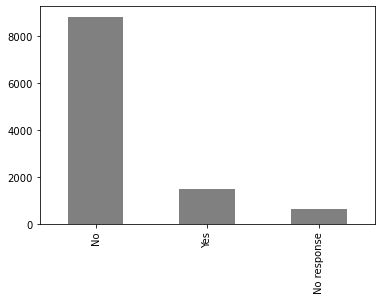

In [65]:
filtered1['response'].value_counts().plot(kind='bar',color='grey')

### plot of the rate of the response types by each Sales Channel

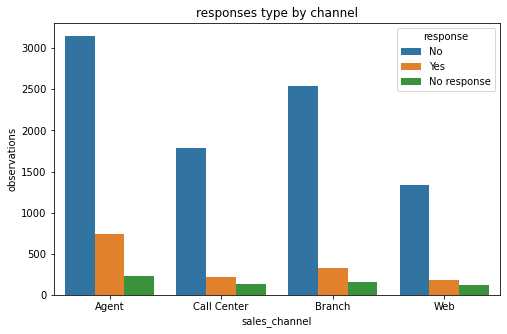

In [66]:
plt.figure(figsize=(8,5))
sns.countplot(x='sales_channel', hue='response', data=df)
plt.ylabel('observations')
plt.title('responses type by channel')
plt.show() #tidy up display

### Plot of the distribution of the Total Claim Amount, broken down by response type. Try a boxplot and distribution plot, for each response type. For the distribution plot, try to plot both kinds of responses in one chart

In [67]:
filtered1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10910 entries, 0 to 10909
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   unnamed                        10910 non-null  int64         
 1   customer                       10910 non-null  object        
 2   state                          10910 non-null  object        
 3   customer_lifetime_value        10910 non-null  float64       
 4   response                       10910 non-null  object        
 5   coverage                       10910 non-null  object        
 6   education                      10910 non-null  object        
 7   effective_to_date              10910 non-null  datetime64[ns]
 8   employmentstatus               10910 non-null  object        
 9   gender                         10910 non-null  object        
 10  income                         10910 non-null  int64         
 11  location_code  

<AxesSubplot:xlabel='total_claim_amount', ylabel='response'>

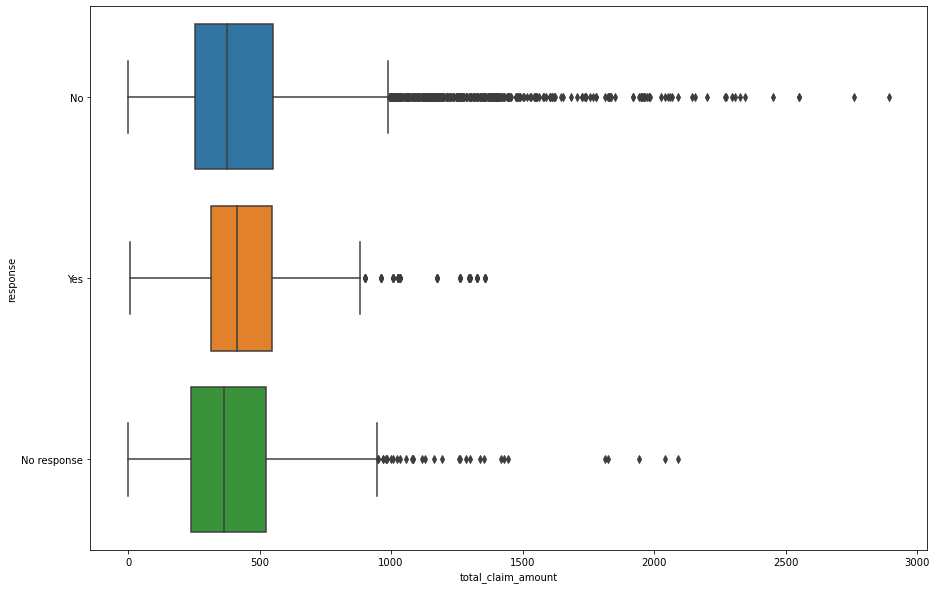

In [68]:
plt.figure(figsize=(15,10))
sns.boxplot(x="total_claim_amount",y="response",data=filtered1)

<Figure size 864x864 with 0 Axes>

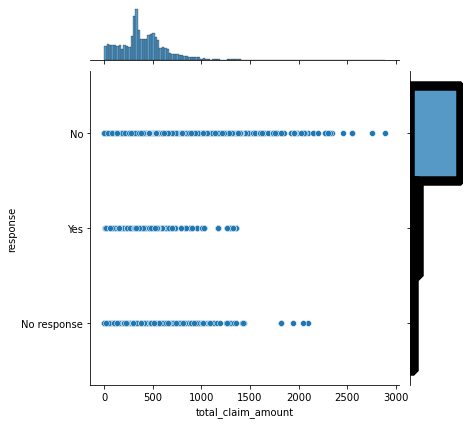

In [69]:
plt.figure(figsize=(12,12))
sns.jointplot(x=filtered1['total_claim_amount'], y=filtered1['response'])

<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

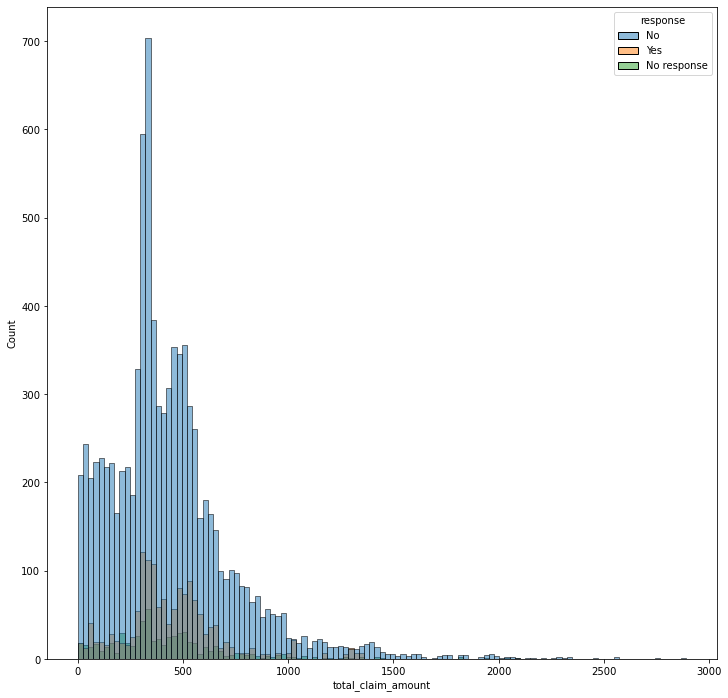

In [70]:
#create histogram 
plt.figure(figsize=(12,12))
sns.histplot(data=filtered1, x="total_claim_amount", hue="response")


### Create similar plots like in the task before, but for Income

<AxesSubplot:xlabel='income', ylabel='response'>

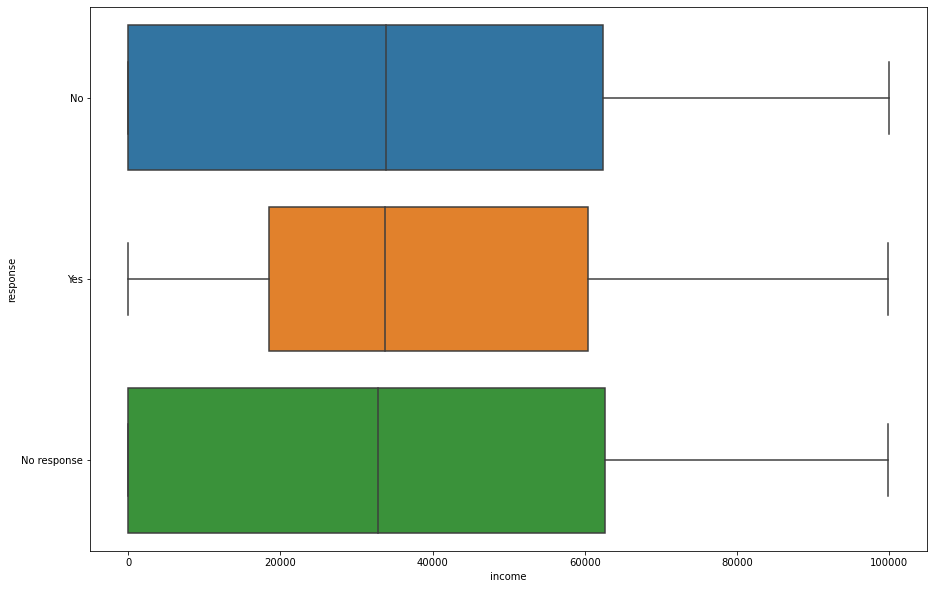

In [71]:
plt.figure(figsize=(15,10))
sns.boxplot(x="income",y="response",data=filtered1)

<Figure size 1296x864 with 0 Axes>

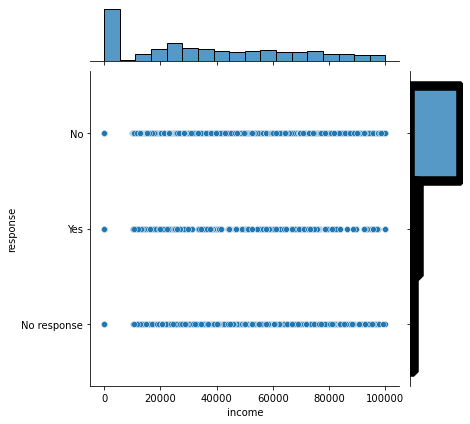

In [72]:
plt.figure(figsize=(18,12))
sns.jointplot(x=filtered1['income'], y=filtered1['response'])

<AxesSubplot:xlabel='income', ylabel='Count'>

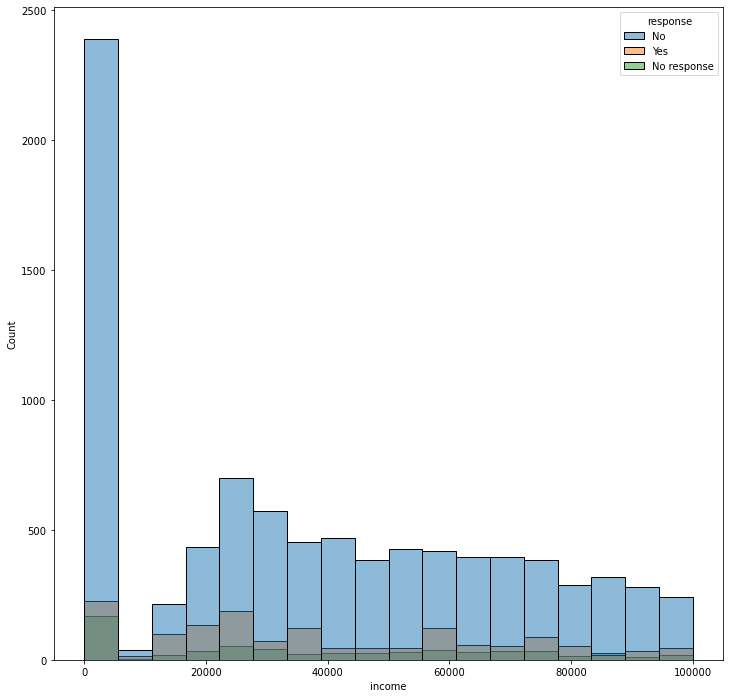

In [73]:
 
plt.figure(figsize=(12,12))
sns.histplot(data=filtered1, x="income", hue="response")

### Create a scatterplot between Total Claim Amount and Income. Play around with the settings of the scatterplot (markersize, alpha level, ...) and in doing so try to identify more features within the data just visually. You can also try different seaborn plots. Check for example this link which explains how to avoid overplotting.

<AxesSubplot:xlabel='income', ylabel='total_claim_amount'>

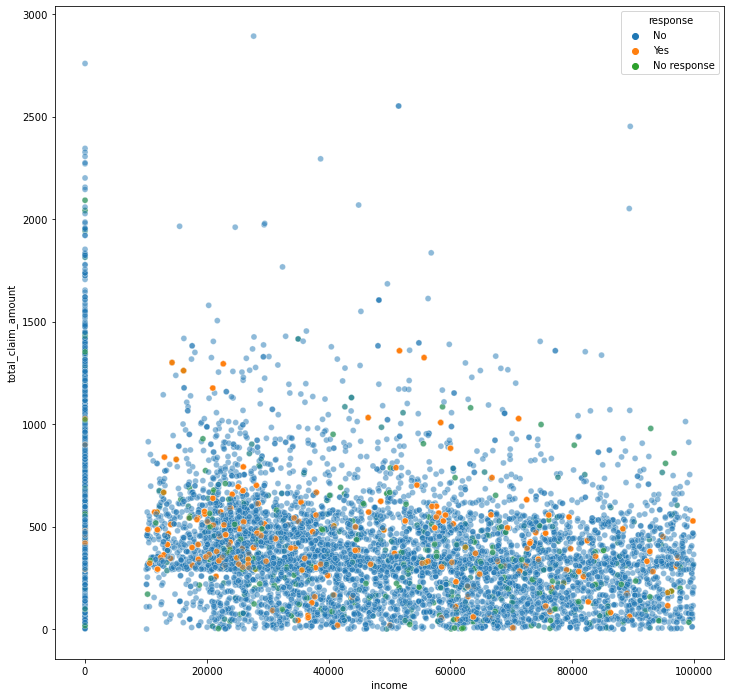

In [80]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=filtered1, y="total_claim_amount", x="income", hue='response', alpha=0.5)